In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
import dask.array as da
import dask.dataframe as dd
import dask
import scipy
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_288879/2491741907.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [13]:
# file_path = 'Nc_Files/acp-21-15619-2021.in'

# # Open the file for reading
# with open(file_path, 'r') as file:
#     # Read all lines from the file
#     lines = file.readlines()

# # Print the contents of the file
# for line in lines:
#     print(line.strip())


In [2]:
file = 'Nc_Files/new_Na_Fe_Mg_Si_K_Ca_f.c54137.FX2000climo.f19_f19.ZGTest.001.cam.i.0002-01-01-00000_c170817.nc'
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (time: 1, lev: 126, lat: 96, lon: 144, slat: 95, slon: 144,
                   ilev: 127, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lev           (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * slat          (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon          (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
  * time          (time) datetime64[ns] 2004-01-02
Dimensions without coordinates: nbnd
Data variables: (12/170)
    AOA1          (time, lev, lat, lon) float64 ...
    AOA2          (time, lev, lat, lon) float64 ...
    BRCL          (time, lev, lat, lon) float64 ...
    BRO           (time, lev, lat, lon) float64 ...
    BRONO2        (time, lev, lat, lon) float64 ...
    BRY           (time, lev, lat, lon) float64 ...
    ...            ...
    KO            (time, lev, lat, lon) float64 ...
    KO2           (time, lev, lat, lon) float64 ...
    KO2p          (time, lev, lat, lon) float64 ...
    KOH           (time, lev, lat, lon) float64 ...
    KOp           (time, lev, lat, lon) float64 ...
    Kp            (time, lev, lat, lon) float64 ...
Attributes: (12/13)
    Conventions:       CF-1.0
    source:            CAM
    case:              waccm_geos_3k
    title:             UNSET
    logname:           earfw
    host:              g8s11n1.polaris.
    ...                ...
    revision_Id:       $Id$
    initial_file:      /nobackup/earfw/cesm/archive/waccm_geos_all/rest/2012-...
    topography_file:   /nobackup/earfw/CESM1.0/waccm4_input//atm/cam/met/USGS...
    time_period_freq:  day_1
    history:           Thu May 16 14:35:13 2019: ncks -v ^K.? waccmx_k.nc new...
    NCO:               4.3.6

In [3]:
CO2 = ds['CO2']
#T = ds['T']
lev = ds['lev']

In [6]:
#T.values

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [10]:
#CO2dens = ( CO2 * 1e-6 * 100 * lev ) / (1.380503e-23 * T)
#CO2dens.values

array([[[[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         ...,
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf]],

        [[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         ...,
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf]],

        [[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         ...,
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf]],

        ...,

        [[inf, inf, inf, ..., inf, inf, inf],
         [inf, inf, inf, ..., inf, inf, inf],
         [inf, inf

In [64]:
#Z = (( 1.380649e-23 * T ) / 9.8 ) * np.log( lev*10**-2 / 101325 )

In [12]:
CO2m = CO2.mean(dim='lat')
CO2me = CO2m.mean(dim='lon')
CO2mean = CO2me.mean(dim='time')


# Zm = Z.mean(dim='lat')
# Zme = Zm.mean(dim='lon')
# Zmean = Zme.mean(dim='time')
# Zmean

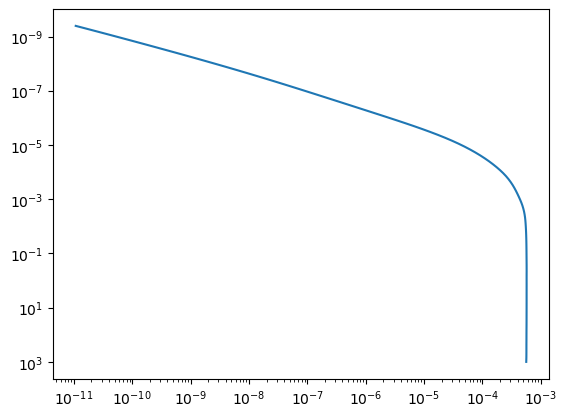

In [13]:
# Plotting the line plot with reversed lev
plt.plot(CO2mean, lev)

# Setting ticks with reversed lev
plt.yticks(lev)#, labels=[f'{val:.1f}' for val in lev_reverse])
plt.xscale('log')
plt.yscale('log')

plt.gca().invert_yaxis()

plt.show()

In [16]:
CO2mean[-1]

<xarray.DataArray 'CO2' ()>
array(0.00056198)
Coordinates:
    lev      float64 992.6